In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import sys

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7
plt.rcParams["figure.figsize"] = (2,2)
plt.rcParams["figure.dpi"] = 300
plt.rcParams['svg.fonttype'] = 'none'

sys.path.append("/mnt/c/Users/ochapman/Documents/Mesirov/scRNA+ATAC/src")
from SingleCellExperiment import *

# pdx

In [56]:
def read_ssgsea(file):
    df = pd.read_csv(file,sep='\t',skiprows=2,index_col=0).transpose().iloc[1:,:]
    return df

def read_gene_expression(dnttip2_file, kmt2e_file):
    df1 = pd.read_csv(dnttip2_file,sep='\t',index_col=1).iloc[:,1]
    df2 = pd.read_csv(kmt2e_file,sep='\t',index_col=1).iloc[:,1]
    return pd.concat([df1,df2],axis=1,join='inner')

file='out/rcmb56-pdx_scale.data.PROJ.gct'
ssgsea = read_ssgsea(file)

file1='../2021-08-29_seurat/rcmb56-pdx_dnttip2.sct.tsv'
file2='../2021-08-29_seurat/rcmb56-pdx_kmt2e.sct.tsv'
gex = read_gene_expression(file1,file2)

data = rcmb56pdx().get_qc_pass_cells()

(0.5978919538081544, 0.0)
(0.789925364797551, 0.0)
(-0.06844999849016262, 2.7900116190136784e-12)
(-0.06844999849016262, 2.7900116190136784e-12)


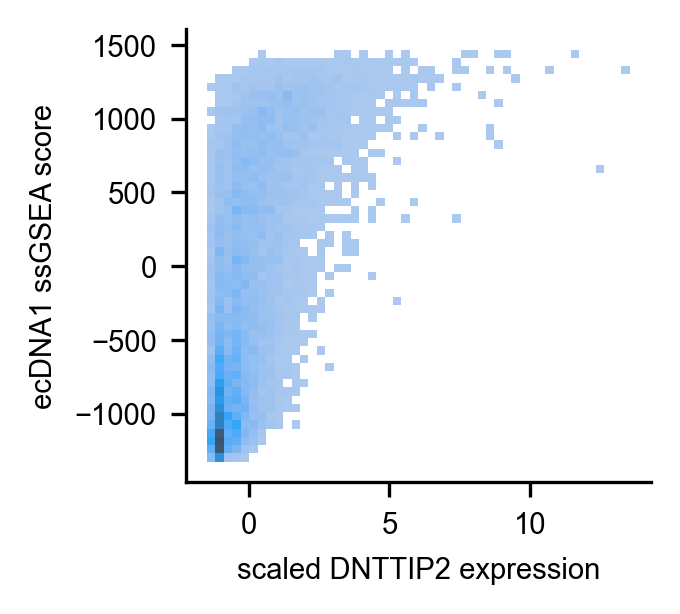

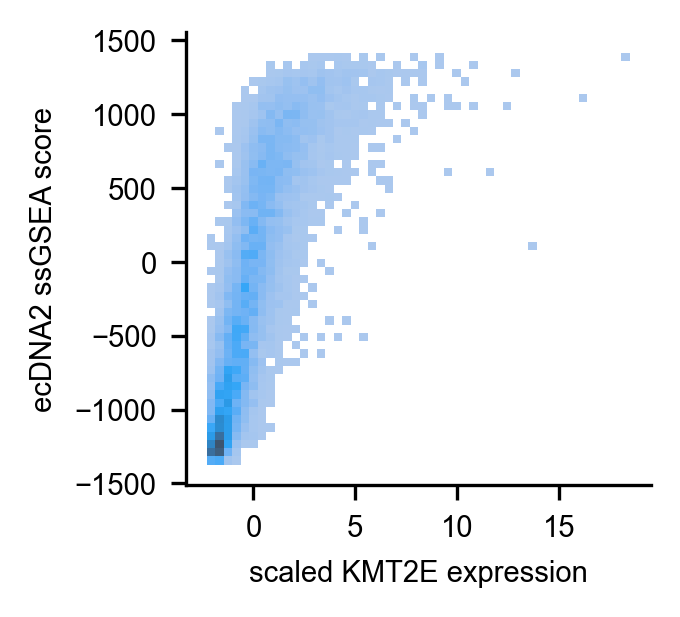

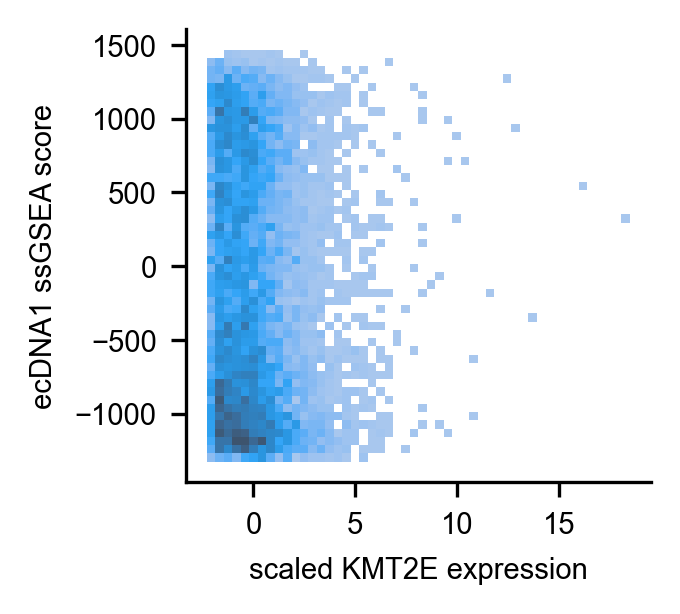

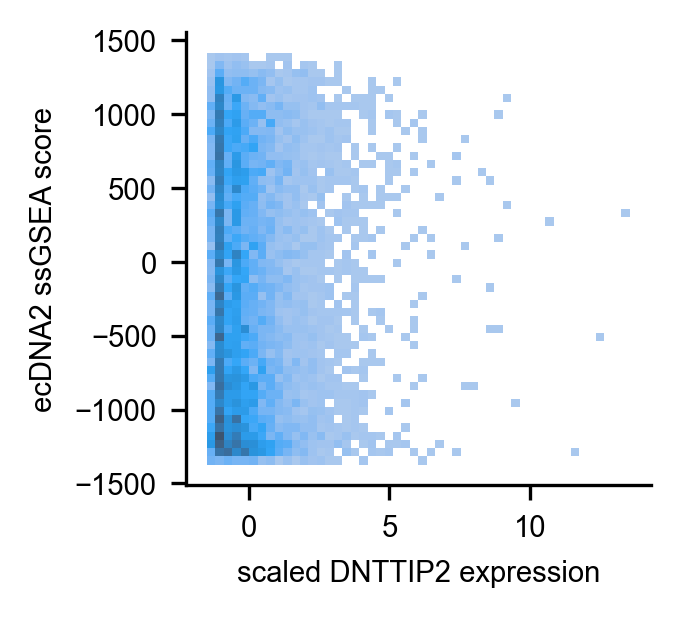

In [57]:
def correlate_ssgsea_gex():
    '''
    dnttip2 exp should correlate with ssgsea for ecDNA1; likewise for kmt2e and ecDNA2.
    '''
    df = pd.concat([ssgsea,gex],axis=1,join='inner')
    fig = plt.figure()
    ax = sns.histplot(data=df,x='DNTTIP2',y='RCMB56_1',bins=50)
    ax.set(xlabel='scaled DNTTIP2 expression', ylabel='ecDNA1 ssGSEA score')
    sns.despine()
    fig.savefig('ssgsea1_x_dnttip2.svg')
    fig.savefig('ssgsea1_x_dnttip2.png')
    print(scipy.stats.pearsonr(df['DNTTIP2'],df['RCMB56_1']))
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='KMT2E',y='RCMB56_2',bins=50)
    ax.set(xlabel='scaled KMT2E expression', ylabel='ecDNA2 ssGSEA score')
    sns.despine()
    fig.savefig('ssgsea2_x_kmt2e.svg')
    fig.savefig('ssgsea2_x_kmt2e.png')
    print(scipy.stats.pearsonr(df['KMT2E'],df['RCMB56_2']))
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='KMT2E',y='RCMB56_1',bins=50)
    ax.set(xlabel='scaled KMT2E expression', ylabel='ecDNA1 ssGSEA score')
    sns.despine()
    fig.savefig('ssgsea1_x_kmt2e.svg')
    fig.savefig('ssgsea1_x_kmt2e.png')
    print(scipy.stats.pearsonr(df['KMT2E'],df['RCMB56_1']))
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='DNTTIP2',y='RCMB56_2',bins=50)
    ax.set(xlabel='scaled DNTTIP2 expression', ylabel='ecDNA2 ssGSEA score')
    sns.despine()
    fig.savefig('ssgsea2_x_dnttip2.svg')
    fig.savefig('ssgsea2_x_dnttip2.png')
    print(scipy.stats.pearsonr(df['KMT2E'],df['RCMB56_1']))
    return

# Very curious, it looks like gene expression is sufficient but not necessary to generate high ssGSEA value.
correlate_ssgsea_gex()

(0.7562045654939724, 0.0)
(0.6752112310802049, 0.0)
(-0.06660829718045976, 6.174046185116409e-11)
(-0.046524581841025384, 4.992936523643788e-06)


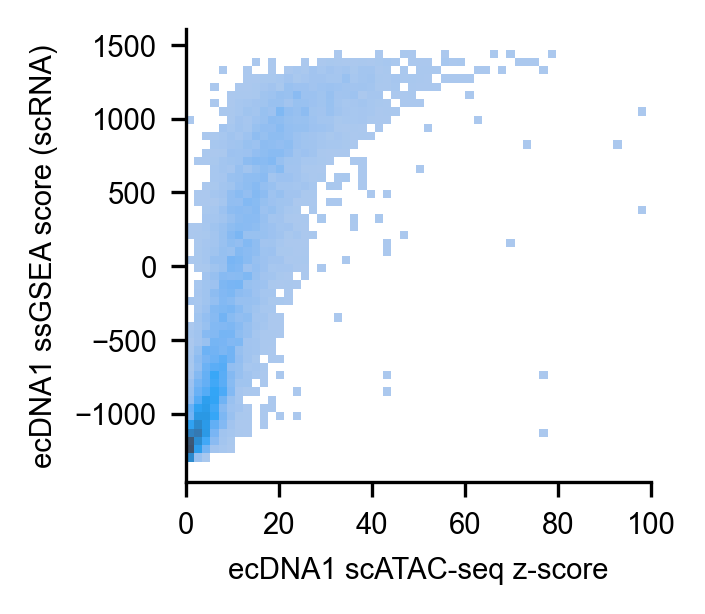

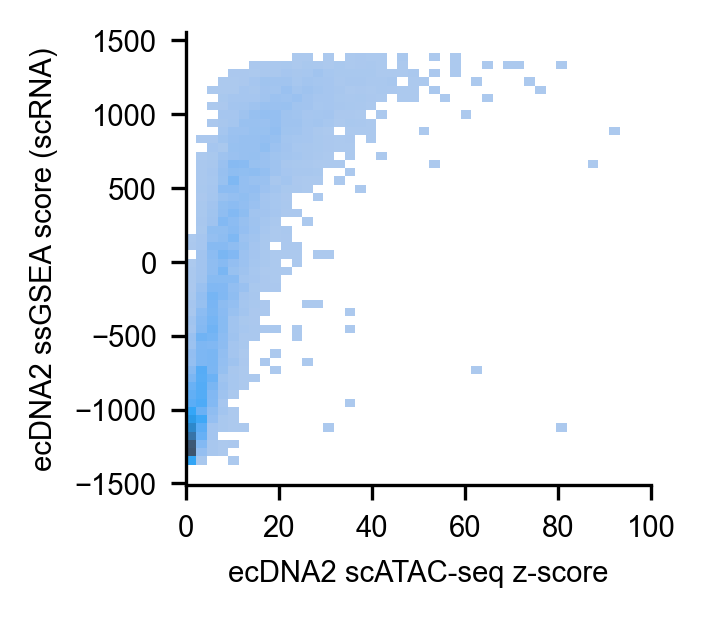

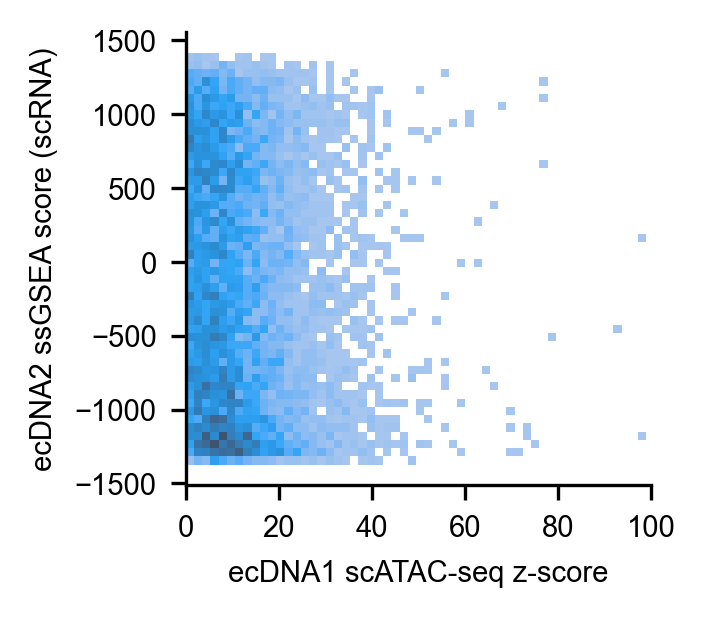

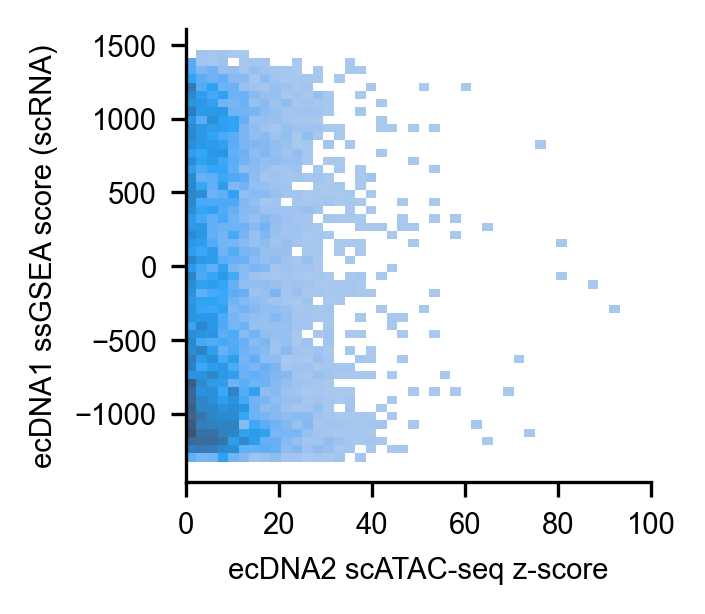

In [58]:
def correlate_ssgsea_atac():
    df = pd.concat([data,ssgsea],axis=1,join='inner')
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='ecDNA1_z-score',y='RCMB56_1',bins=(150,50))
    ax.set(xlim=(0, 100))
    ax.set(ylabel='ecDNA1 ssGSEA score (scRNA)', xlabel='ecDNA1 scATAC-seq z-score')
    sns.despine()
    fig.savefig('zscore1_x_ssgsea1.svg')
    print(scipy.stats.pearsonr(df['ecDNA1_z-score'],df['RCMB56_1']))
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='ecDNA2_z-score',y='RCMB56_2',bins=(200,50))
    ax.set(xlim=(0,100))
    ax.set(ylabel='ecDNA2 ssGSEA score (scRNA)', xlabel='ecDNA2 scATAC-seq z-score')
    sns.despine()
    fig.savefig('zscore2_x_ssgsea2.svg')
    print(scipy.stats.pearsonr(df['ecDNA2_z-score'],df['RCMB56_2']))
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='ecDNA1_z-score',y='RCMB56_2',bins=(150,50))
    ax.set(xlim=(0, 100))
    ax.set(ylabel='ecDNA2 ssGSEA score (scRNA)', xlabel='ecDNA1 scATAC-seq z-score')
    sns.despine()
    fig.savefig('zscore1_x_ssgsea2.svg')
    print(scipy.stats.pearsonr(df['ecDNA1_z-score'],df['RCMB56_2']))
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='ecDNA2_z-score',y='RCMB56_1',bins=(200,50))
    ax.set(xlim=(0,100))
    ax.set(ylabel='ecDNA1 ssGSEA score (scRNA)', xlabel='ecDNA2 scATAC-seq z-score')
    sns.despine()
    fig.savefig('zscore2_x_ssgsea1.svg')
    print(scipy.stats.pearsonr(df['ecDNA2_z-score'],df['RCMB56_1']))
    return
correlate_ssgsea_atac()

(0.5626846468594545, 0.0)
(0.6847446805811779, 0.0)
(-0.05743457893870806, 1.7284062735282055e-08)
(-0.0031617480000509456, 0.7565078954876991)


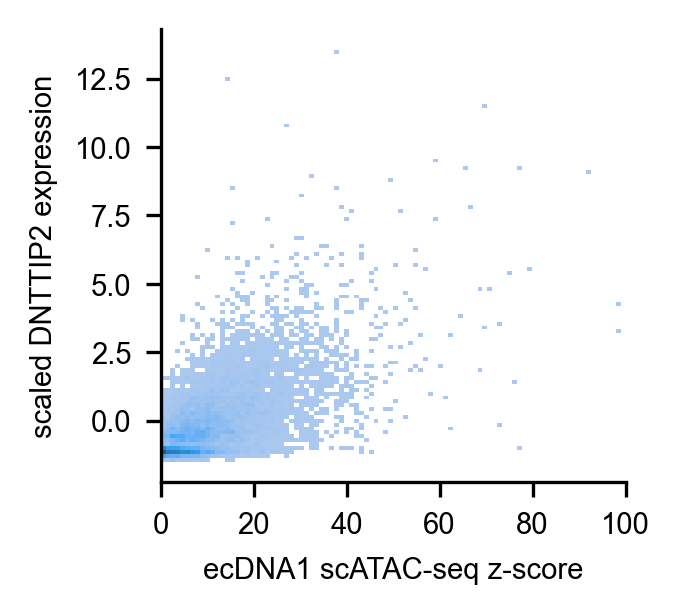

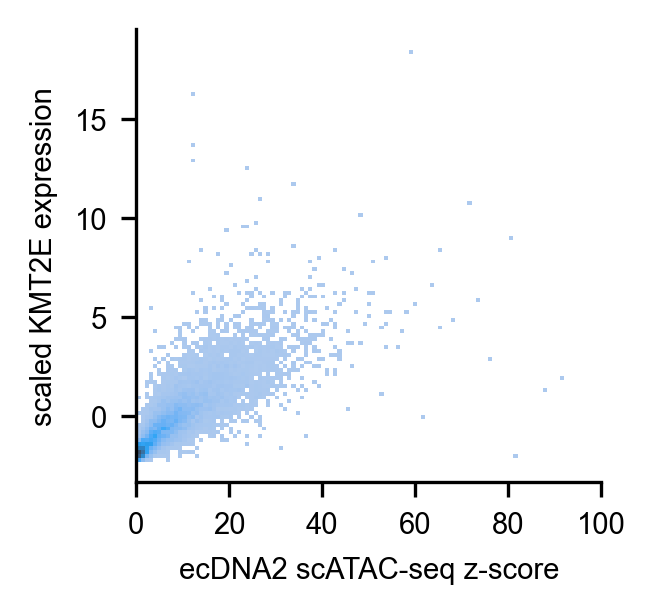

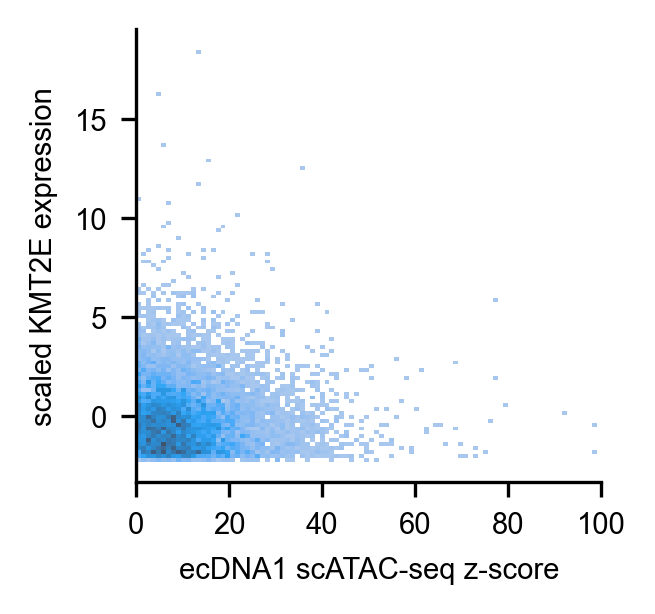

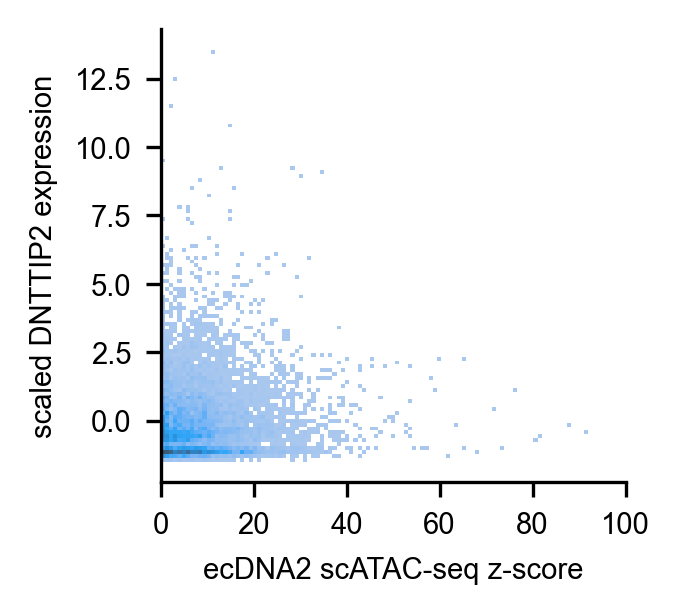

In [59]:
def correlate_gex_atac():
    df = pd.concat([data,gex],axis=1,join='inner')
    fig = plt.figure()
    ax = sns.histplot(data=df,x='ecDNA1_z-score',y='DNTTIP2')
    ax.set(xlim=(0, 100))
    ax.set(ylabel='scaled DNTTIP2 expression', xlabel='ecDNA1 scATAC-seq z-score')
    sns.despine()
    fig.savefig('zscore1_x_dnttip2.svg')
    print(scipy.stats.pearsonr(df['ecDNA1_z-score'],df['DNTTIP2']))
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='ecDNA2_z-score',y='KMT2E')
    ax.set(xlim=(0, 100))
    ax.set(ylabel='scaled KMT2E expression', xlabel='ecDNA2 scATAC-seq z-score')
    sns.despine()
    fig.savefig('zscore2_x_kmt2e.svg')
    print(scipy.stats.pearsonr(df['ecDNA2_z-score'],df['KMT2E']))
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='ecDNA1_z-score',y='KMT2E')
    ax.set(xlim=(0, 100))
    ax.set(ylabel='scaled KMT2E expression', xlabel='ecDNA1 scATAC-seq z-score')
    sns.despine()
    fig.savefig('zscore1_x_kmt2e.svg')
    print(scipy.stats.pearsonr(df['ecDNA1_z-score'],df['KMT2E']))
    
    fig = plt.figure()
    ax = sns.histplot(data=df,x='ecDNA2_z-score',y='DNTTIP2')
    ax.set(xlim=(0, 100))
    ax.set(ylabel='scaled DNTTIP2 expression', xlabel='ecDNA2 scATAC-seq z-score')
    sns.despine()
    fig.savefig('zscore2_x_dnttip2.svg')
    print(scipy.stats.pearsonr(df['ecDNA2_z-score'],df['DNTTIP2']))
    return
correlate_gex_atac()

# ht

In [60]:
file='out/rcmb56-ht_scale.data.PROJ.gct'
ssgsea = read_ssgsea(file)

file1='../2021-08-29_seurat/rcmb56-ht_dnttip2.sct.tsv'
file2='../2021-08-29_seurat/rcmb56-ht_kmt2e.sct.tsv'
gex = read_gene_expression(file1,file2)

data = rcmb56ht().get_qc_pass_cells()

(0.33799899965727503, 1.4015497724486184e-07)
(0.05446982216895024, 0.0061251391611669165)
(0.33779472014345313, 0.0003732268996639288)
(0.11172971474820907, 7.813490943712971e-09)


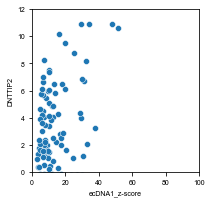

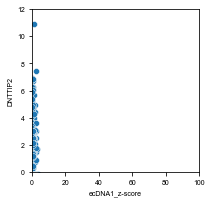

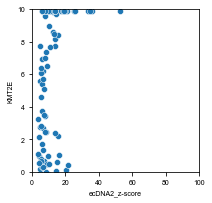

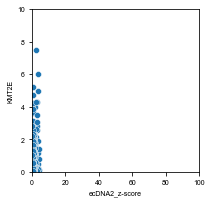

In [22]:
def correlate_gex_atac():
    df = pd.concat([data,gex],axis=1,join='inner')
    df1 = df[df['ecDNA1_status']==True]
    df2 = df[df['ecDNA1_status']==False]
    plt.figure()
    ax = sns.scatterplot(data=df1,x='ecDNA1_z-score',y='DNTTIP2')
    ax.set(xlim=(0, 100),ylim=(0,12))
    print(scipy.stats.pearsonr(df1['ecDNA1_z-score'],df1['DNTTIP2']))
    plt.figure()
    ax = sns.scatterplot(data=df2,x='ecDNA1_z-score',y='DNTTIP2')
    ax.set(xlim=(0, 100),ylim=(0,12))
    print(scipy.stats.pearsonr(df2['ecDNA1_z-score'],df2['DNTTIP2']))
    
    df1 = df[df['ecDNA2_status']==True]
    df2 = df[df['ecDNA2_status']==False]
    plt.figure()
    ax = sns.scatterplot(data=df1,x='ecDNA2_z-score',y='KMT2E')
    ax.set(xlim=(0, 100),ylim=(0,10))
    print(scipy.stats.pearsonr(df1['ecDNA2_z-score'],df1['KMT2E']))
    plt.figure()
    ax = sns.scatterplot(data=df2,x='ecDNA2_z-score',y='KMT2E')
    ax.set(xlim=(0, 100),ylim=(0,10))
    print(scipy.stats.pearsonr(df2['ecDNA2_z-score'],df2['KMT2E']))
    
    return
correlate_gex_atac()

(0.2596318363204649, 2.873772277163759e-40)
(0.5098654992442202, 1.0925079030929843e-16)
(0.3339158716973316, 3.6249910573695684e-70)
(0.8509253114132228, 3.985738082369064e-31)


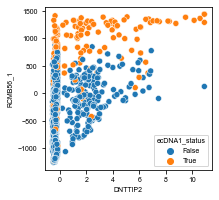

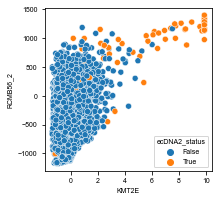

In [26]:
def correlate_ssgsea_gex():
    '''
    dnttip2 exp should correlate with ssgsea for ecDNA1; likewise for kmt2e and ecDNA2.
    '''
    df = pd.concat([data,ssgsea,gex],axis=1,join='inner')
    df1 = df[df['ecDNA1_status']==False]
    df2 = df[df['ecDNA1_status']==True]
    plt.figure()
    sns.scatterplot(data=df,x='DNTTIP2',y='RCMB56_1',hue='ecDNA1_status')
    print(scipy.stats.pearsonr(df1['DNTTIP2'],df1['RCMB56_1']))
    print(scipy.stats.pearsonr(df2['DNTTIP2'],df2['RCMB56_1']))
    df1 = df[df['ecDNA2_status']==False]
    df2 = df[df['ecDNA2_status']==True]
    plt.figure()
    sns.scatterplot(data=df,x='KMT2E',y='RCMB56_2',hue='ecDNA2_status')
    print(scipy.stats.pearsonr(df1['KMT2E'],df1['RCMB56_2']))
    print(scipy.stats.pearsonr(df2['KMT2E'],df2['RCMB56_2']))
    return

# Very curious, it looks like gene expression is sufficient but not necessary to generate high ssGSEA value.
correlate_ssgsea_gex()

MannwhitneyuResult(statistic=93426.0, pvalue=3.533267595442081e-66)
MannwhitneyuResult(statistic=47102.0, pvalue=4.0291123319574467e-32)


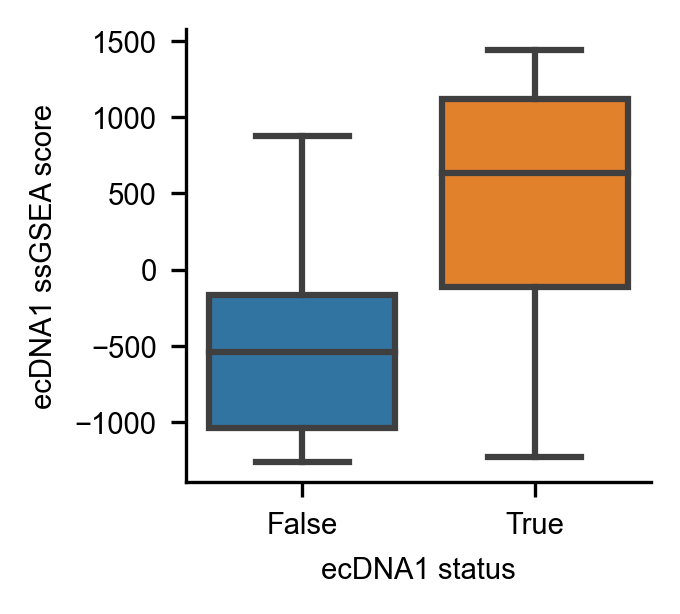

<Figure size 600x600 with 0 Axes>

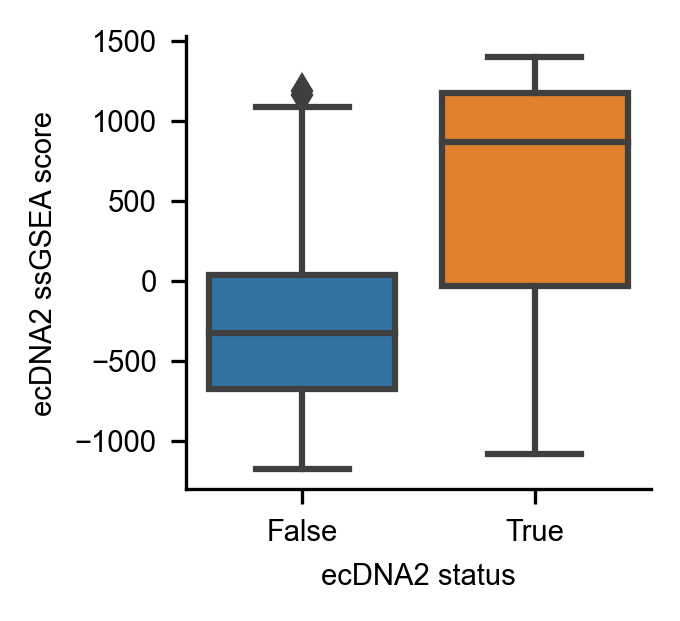

<Figure size 600x600 with 0 Axes>

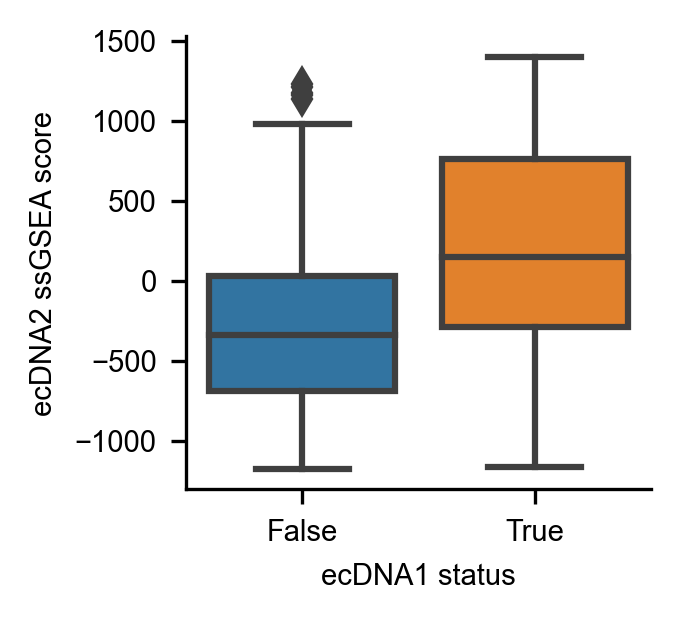

<Figure size 600x600 with 0 Axes>

In [61]:
def test_ssgsea_atac():
    df = pd.concat([data,ssgsea],axis=1,join='inner')
    fig = plt.figure()
    ax = sns.boxplot(data=df,x='ecDNA1_status',y='RCMB56_1')
    ax.set(xlabel='ecDNA1 status', ylabel='ecDNA1 ssGSEA score')
    sns.despine()
    fig.savefig('ht_ecDNA1_x_ssgsea1.svg')
    plt.figure()
    df1 = df[df['ecDNA1_status']==True]
    df2 = df[df['ecDNA1_status']==False]
    print(scipy.stats.mannwhitneyu(df1.RCMB56_1, df2.RCMB56_1))
    
    fig = plt.figure()
    ax = sns.boxplot(data=df,x='ecDNA2_status',y='RCMB56_2')
    ax.set(xlabel='ecDNA2 status', ylabel='ecDNA2 ssGSEA score')
    sns.despine()
    fig.savefig('ht_ecDNA2_x_ssgsea2.svg')
    plt.figure()
    df1 = df[df['ecDNA2_status']==True]
    df2 = df[df['ecDNA2_status']==False]
    print(scipy.stats.mannwhitneyu(df1.RCMB56_2, df2.RCMB56_2))
    
    fig = plt.figure()
    ax = sns.boxplot(data=df,x='ecDNA1_status',y='RCMB56_2')
    ax.set(xlabel='ecDNA1 status', ylabel='ecDNA2 ssGSEA score')
    sns.despine()
    #fig.savefig('ht_ecDNA1_x_ssgsea2.svg')
    plt.figure()
test_ssgsea_atac()

(0.4231886864992612, 1.918770629423828e-120)
(0.4231886864992612, 1.918770629423828e-120)
(0.32111382548239203, 2.823375753006922e-67)
(0.32111382548239203, 2.823375753006922e-67)


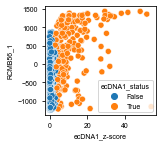

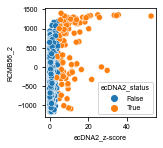

In [41]:
def correlate_ssgsea_atac():
    df = pd.concat([data,ssgsea],axis=1,join='inner')
    #df1 = df[df['ecDNA1_status']==True]
    #df2 = df[df['ecDNA1_status']==False]
    plt.figure()
    ax = sns.scatterplot(data=df,x='ecDNA1_z-score',y='RCMB56_1',hue='ecDNA1_status')
    print(scipy.stats.pearsonr(df['ecDNA1_z-score'],df['RCMB56_1']))
    #df1 = df[df['ecDNA1_status']==True]
    #df2 = df[df['ecDNA1_status']==False]
    plt.figure()
    ax = sns.scatterplot(data=df,x='ecDNA2_z-score',y='RCMB56_2',hue='ecDNA2_status')
    print(scipy.stats.pearsonr(df['ecDNA2_z-score'],df['RCMB56_2']))
    return
correlate_ssgsea_atac()